In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
xhr = pd.read_csv('./XHR15-22(1980).csv')


In [3]:

Q1 = xhr['Adjusted Close'].quantile(0.25)
Q2 = xhr['Adjusted Close'].quantile(0.75)

IQR = Q2 - Q1


In [4]:
xhr = xhr[~((xhr['Adjusted Close'] < (Q1 - (1.5 * IQR))) | (xhr['Adjusted Close'] > (Q2 + (1.5 * IQR))))]
xhr = xhr[~((xhr['Close'] < (Q1 - (1.5 * IQR))) | (xhr['Close'] > (Q2 + (1.5 * IQR))))]
xhr = xhr[~((xhr['Open'] < (Q1 - (1.5 * IQR))) | (xhr['Open'] > (Q2 + (1.5 * IQR))))]


In [5]:
xhr


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,04/02/2015,20.500000,21.000000,1491700,23.650000,20.549999,15.101096
1,05/02/2015,20.120001,20.120001,1690400,20.600000,20.320000,14.932081
2,06/02/2015,20.250000,20.250000,1187600,20.730000,20.700001,15.211327
3,09/02/2015,20.370001,20.510000,1067500,21.030001,20.959999,15.402384
4,10/02/2015,20.719999,20.719999,1260400,21.780001,20.910000,15.365643
...,...,...,...,...,...,...,...
1974,06/12/2022,14.410000,14.470000,485800,14.660000,14.540000,14.540000
1975,07/12/2022,14.390000,14.390000,1757400,14.930000,14.760000,14.760000
1976,08/12/2022,14.890000,14.890000,1010900,15.440000,15.180000,15.180000
1977,09/12/2022,14.910000,14.910000,916400,15.230000,15.190000,15.190000


In [6]:
print("Mean For Adjusted Close", xhr['Adjusted Close'].mean())
print("Mean For Volumes", xhr['Volume'].mean())
print("Mean For Open", xhr['Open'].mean())
print("Mean For Close", xhr['Close'].mean())
print("Mean For High", xhr['High'].mean())
print("Mean For Low", xhr['Low'].mean())


Mean For Adjusted Close 16.19453874137924
Mean For Volumes 664315.0840506329
Mean For Open 18.141310392729114
Mean For Close 18.144126592534175
Mean For High 18.39543800163696
Mean For Low 17.883943809178227


In [7]:
print("Mean For Adjusted Close", xhr['Adjusted Close'].median())
print("Mean For Volumes", xhr['Volume'].median())
print("Mean For Open", xhr['Open'].median())
print("Mean For Close", xhr['Close'].median())
print("Mean For High", xhr['High'].median())
print("Mean For Low", xhr['Low'].median())



Mean For Adjusted Close 16.75128746
Mean For Volumes 520700.0
Mean For Open 18.62999916
Mean For Close 18.61000061
Mean For High 18.88999939
Mean For Low 18.28499985


Text(0, 0.5, 'XHR')

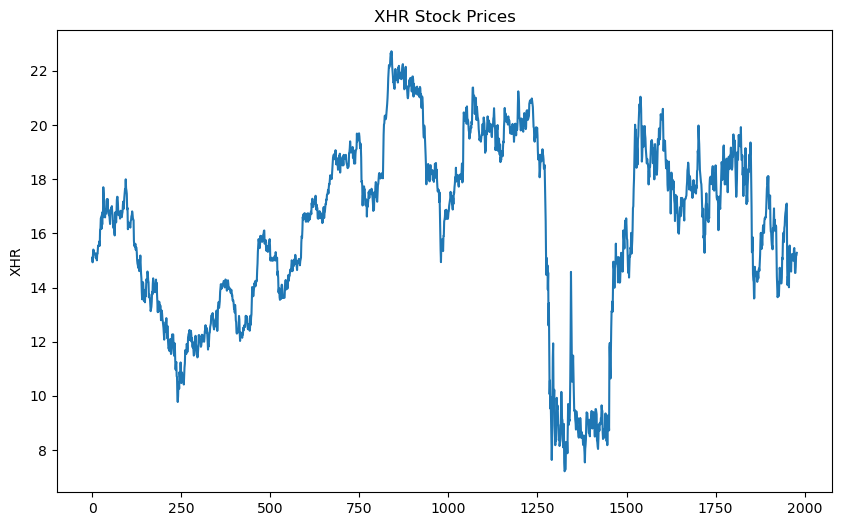

In [8]:

xhr['Adjusted Close'].plot(figsize = (10, 6), title = 'XHR Stock Prices')
plt.ylabel('XHR')



In [9]:
xhr_SM1 = xhr
xhr_SM1['SM_AC0-500'] = xhr['Adjusted Close'].rolling(500).median()
xhr_SM1['SM_V0-500'] = xhr['Volume'].rolling(500).median()
xhr_SM1['SM_CL0-500'] = xhr['Close'].rolling(500).mean()
xhr_SM1['SM_OP0-500'] = xhr['Open'].rolling(500).mean()
xhr_SM1['SM_H0-500'] = xhr['High'].rolling(500).std()
xhr_SM1['SM_L0-500'] = xhr['Low'].rolling(500).std()
xhr_SM1.set_index('Date', inplace = True)


In [10]:
xhr_SM2 = xhr
wn_sz = 500
xhr_SM2['SM_AC501-1000'] = xhr['Adjusted Close'].rolling(window = wn_sz, center = True).median()
xhr_SM2['SM_V501-1000'] = xhr['Volume'].rolling(window = wn_sz, center = True).median()
xhr_SM2['SM_CL501-1000'] = xhr['Close'].rolling(window = wn_sz, center = True).mean()
xhr_SM2['SM_OP501-1000'] = xhr['Open'].rolling(window = wn_sz, center = True).mean()
xhr_SM2['SM_H501-1000'] = xhr['High'].rolling(window = wn_sz, center = True).std()
xhr_SM2['SM_L501-1000'] = xhr['Low'].rolling(window = wn_sz, center = True).std()


In [11]:

xhr_SM2.dropna()

,Low,Open,Volume,High,Close,Adjusted Close,SM_AC0-500,SM_V0-500,SM_CL0-500,SM_OP0-500,SM_H0-500,SM_L0-500,SM_AC501-1000,SM_V501-1000,SM_CL501-1000,SM_OP501-1000,SM_H501-1000,SM_L501-1000
Date,,,,,,,,,,,,,,,,,,
27/01/2017,18.760000,19.240000,329700,19.240000,18.889999,15.537787,13.754552,527400.0,18.10850,18.07806,2.821532,2.759007,14.593714,440950.0,18.09578,18.07676,2.282552,2.303887
30/01/2017,18.190001,18.870001,375400,18.870001,18.240000,15.003138,13.754552,525100.0,18.10388,18.07380,2.811570,2.756500,14.599743,439950.0,18.11264,18.09296,2.285058,2.306679
31/01/2017,18.070000,18.120001,505400,18.389999,18.350000,15.093616,13.754552,522650.0,18.09994,18.06980,2.809725,2.754640,14.612289,439500.0,18.13036,18.11048,2.285991,2.307182
01/02/2017,18.180000,18.400000,291900,18.730000,18.240000,15.003138,13.754552,522000.0,18.09502,18.06610,2.807712,2.752573,14.628308,439100.0,18.14714,18.12786,2.285065,2.305776
02/02/2017,18.049999,18.190001,305200,18.290001,18.230000,14.994912,13.754552,521650.0,18.08956,18.06146,2.805080,2.750256,14.640855,439100.0,18.16284,18.14454,2.284558,2.305269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/12/2021,17.170000,17.240000,359400,17.500000,17.240000,17.119524,16.449242,606600.0,15.01042,15.02283,4.475094,4.495974,17.576311,504400.0,17.42320,17.42711,1.727208,1.688810
10/12/2021,17.070000,17.330000,565900,17.480000,17.209999,17.089733,16.449242,606600.0,15.00250,15.01453,4.467457,4.488065,17.576311,504400.0,17.42248,17.42597,1.729027,1.690450
13/12/2021,16.620001,16.950001,558000,16.969999,16.709999,16.593227,16.449242,606600.0,14.99362,15.00625,4.459562,4.479891,17.576311,504400.0,17.42426,17.42583,1.728443,1.688663


In [14]:

xhr_SM3 = xhr
wn_sz = 1000
xhr_SM3['SM_AC1001-1500'] = xhr['Adjusted Close'].rolling(window = wn_sz, center = True).median()
xhr_SM3['SM_V1001-1500'] = xhr['Volume'].rolling(window = wn_sz, center = True).median()
xhr_SM3['SM_OP1001-1500'] = xhr['Open'].rolling(window = wn_sz, center = True).mean()
xhr_SM3['SM_CL1001-1500'] = xhr['Close'].rolling(window = wn_sz, center = True).mean()
xhr_SM3['SM_H1001-1500'] = xhr['High'].rolling(window = wn_sz, center = True).std()
xhr_SM3['SM_L1001-1500'] = xhr['Low'].rolling(window = wn_sz, center = True).std()



In [15]:
xhr_SM4 = xhr
wn_sz = 1500
xhr_SM4['SM_AC1501-2000'] = xhr['Adjusted Close'].rolling(window = wn_sz, center = True).median()
xhr_SM4['SM_V1501-2000'] = xhr['Volume'].rolling(window = wn_sz, center = True).median()
xhr_SM4['SM_OP1501-2000'] = xhr['Open'].rolling(window = wn_sz, center = True).mean()
xhr_SM4['SM_CL1501-2000'] = xhr['Close'].rolling(window = wn_sz, center = True).mean()
xhr_SM4['SM_H1501-2000'] = xhr['High'].rolling(window = wn_sz, center = True).std()
xhr_SM4['SM_L1501-2000'] = xhr['Low'].rolling(window = wn_sz, center = True).std()

In [16]:

frame = [xhr_SM1, xhr_SM2, xhr_SM3, xhr_SM4]


In [17]:
xhr_CB = pd.concat(frame, axis= 1)


In [18]:
xhr_CB = xhr_CB.loc[:, ~xhr_CB.columns.duplicated()].dropna()

In [19]:
xhr_CB

,Low,Open,Volume,High,Close,Adjusted Close,SM_AC0-500,SM_V0-500,SM_CL0-500,SM_OP0-500,...,SM_OP1001-1500,SM_CL1001-1500,SM_H1001-1500,SM_L1001-1500,SM_AC1501-2000,SM_V1501-2000,SM_OP1501-2000,SM_CL1501-2000,SM_H1501-2000,SM_L1501-2000
Date,,,,,,,,,,,,,,,,,,,,,
26/01/2018,22.361000,22.740000,169600,22.740000,22.500000,19.578285,14.612289,439500.0,18.13036,18.110480,...,19.708553,19.71184,2.632098,2.629725,16.412384,525700.0,18.335475,18.340200,4.160069,4.213271
29/01/2018,22.200001,22.450001,243000,22.450001,22.240000,19.352051,14.628308,439100.0,18.14714,18.127860,...,19.715113,19.71849,2.625761,2.623186,16.412384,525250.0,18.331835,18.336413,4.158693,4.213648
30/01/2018,21.959999,22.160000,307900,22.219999,22.000000,19.143213,14.640855,439100.0,18.16284,18.144540,...,19.721653,19.72434,2.618943,2.615831,16.412384,525250.0,18.328002,18.332627,4.159432,4.214554
31/01/2018,21.959999,22.129999,501700,22.230000,22.200001,19.317244,14.654110,439100.0,18.17944,18.160620,...,19.727203,19.72956,2.612899,2.609583,16.412384,525250.0,18.324289,18.328947,4.159645,4.215143
01/02/2018,21.959999,22.170000,353100,22.400000,22.080000,19.212824,14.708477,439100.0,18.19580,18.177440,...,19.732533,19.73522,2.606776,2.603493,16.412384,525250.0,18.320662,18.324620,4.160131,4.215925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/12/2019,21.410000,21.440001,614500,21.620001,21.520000,20.543962,19.701883,489950.0,21.36578,21.377446,...,18.204398,18.19293,4.638973,4.720429,17.710573,515300.0,18.190839,18.183460,3.962017,4.035239
11/12/2019,21.100000,21.480000,368300,21.545000,21.170000,20.209839,19.703876,489800.0,21.36390,21.376406,...,18.200138,18.18810,4.637629,4.719133,17.710573,515300.0,18.187692,18.180473,3.962972,4.036190
12/12/2019,21.030001,21.090000,506000,21.469999,21.150000,20.190744,19.705569,489800.0,21.36164,21.374286,...,18.195468,18.18320,4.636175,4.717562,17.710573,515300.0,18.184612,18.177513,3.963575,4.036762


<Axes: title={'center': '4 Different Samples'}, xlabel='Date'>

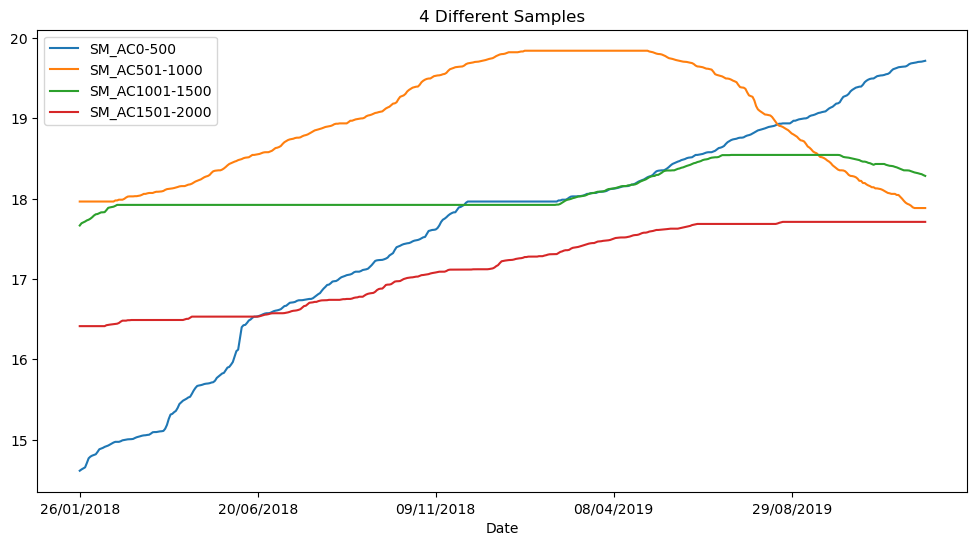

In [20]:

xhr_CB[['SM_AC0-500', 'SM_AC501-1000', 'SM_AC1001-1500', 'SM_AC1501-2000']].plot(figsize = (12, 6), title = '4 Different Samples')

In [21]:
EoR_SM1 = xhr_CB['SM_AC0-500'] / xhr_CB['Adjusted Close'] 
EoR_SM2 = xhr_CB['SM_AC501-1000'] / xhr_CB['Adjusted Close'] 
EoR_SM3 = xhr_CB['SM_AC1001-1500'] / xhr_CB['Adjusted Close'] 
EoR_SM4 = xhr_CB['SM_AC1501-2000'] / xhr_CB['Adjusted Close'] 



In [25]:
EoR_VSM1 = xhr_CB['SM_V0-500'] / xhr_CB['Volume'] 
EoR_VSM2 = xhr_CB['SM_V501-1000'] / xhr_CB['Volume'] 
EoR_VSM3 = xhr_CB['SM_V1001-1500'] / xhr_CB['Volume'] 
EoR_VSM4 = xhr_CB['SM_V1501-2000'] / xhr_CB['Volume'] 

In [23]:
xhr_CB['diff_AC'] = xhr_CB['Adjusted Close'].diff(1)
xhr_CB['diff_V'] = xhr_CB['Volume'].diff(1)
xhr_CB['diff_OP'] = xhr_CB['Open'].diff(1)
xhr_CB['diff_CL'] = xhr_CB['Close'].diff(1)
xhr_CB['diff_H'] = xhr_CB['High'].diff(1)
xhr_CB['diff_L'] = xhr_CB['Low'].diff(1)

In [24]:
xhr_CB['Gain_AC'] = xhr_CB['diff_AC'].clip(lower = 0).round(2)
xhr_CB['Loss_AC'] = xhr_CB['diff_AC'].clip(upper = 0).abs().round(2)

xhr_CB['Gain_V'] = xhr_CB['diff_V'].clip(lower = 0).round(2)
xhr_CB['Loss_V'] = xhr_CB['diff_V'].clip(upper = 0).abs().round(2)

In [26]:
print(xhr_CB[['Gain_AC', 'Loss_AC', 'Gain_V', 'Loss_V']])
xhr_CB.dropna()


            Gain_AC  Loss_AC    Gain_V    Loss_V
Date                                            
26/01/2018      NaN      NaN       NaN       NaN
29/01/2018     0.00     0.23   73400.0       0.0
30/01/2018     0.00     0.21   64900.0       0.0
31/01/2018     0.17     0.00  193800.0       0.0
01/02/2018     0.00     0.10       0.0  148600.0
...             ...      ...       ...       ...
10/12/2019     0.01     0.00   75300.0       0.0
11/12/2019     0.00     0.33       0.0  246200.0
12/12/2019     0.00     0.02  137700.0       0.0
13/12/2019     0.04     0.00       0.0   79800.0
16/12/2019     0.06     0.00  167600.0       0.0

[476 rows x 4 columns]


,Low,Open,Volume,High,Close,Adjusted Close,SM_AC0-500,SM_V0-500,SM_CL0-500,SM_OP0-500,...,diff_AC,diff_V,diff_OP,diff_CL,diff_H,diff_L,Gain_AC,Loss_AC,Gain_V,Loss_V
Date,,,,,,,,,,,,,,,,,,,,,
29/01/2018,22.200001,22.450001,243000,22.450001,22.240000,19.352051,14.628308,439100.0,18.14714,18.127860,...,-0.226234,73400.0,-0.289999,-0.260000,-0.289999,-0.160999,0.00,0.23,73400.0,0.0
30/01/2018,21.959999,22.160000,307900,22.219999,22.000000,19.143213,14.640855,439100.0,18.16284,18.144540,...,-0.208838,64900.0,-0.290001,-0.240000,-0.230001,-0.240002,0.00,0.21,64900.0,0.0
31/01/2018,21.959999,22.129999,501700,22.230000,22.200001,19.317244,14.654110,439100.0,18.17944,18.160620,...,0.174030,193800.0,-0.030001,0.200001,0.010000,0.000000,0.17,0.00,193800.0,0.0
01/02/2018,21.959999,22.170000,353100,22.400000,22.080000,19.212824,14.708477,439100.0,18.19580,18.177440,...,-0.104420,-148600.0,0.040001,-0.120001,0.170000,0.000000,0.00,0.10,0.0,148600.0
02/02/2018,21.410000,21.940001,413200,22.070000,21.600000,18.795156,14.767028,437700.0,18.21140,18.193900,...,-0.417667,60100.0,-0.230000,-0.480000,-0.330000,-0.549999,0.00,0.42,60100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/12/2019,21.410000,21.440001,614500,21.620001,21.520000,20.543962,19.701883,489950.0,21.36578,21.377446,...,0.009544,75300.0,0.080000,0.010000,0.020000,0.049999,0.01,0.00,75300.0,0.0
11/12/2019,21.100000,21.480000,368300,21.545000,21.170000,20.209839,19.703876,489800.0,21.36390,21.376406,...,-0.334124,-246200.0,0.039999,-0.350000,-0.075001,-0.309999,0.00,0.33,0.0,246200.0
12/12/2019,21.030001,21.090000,506000,21.469999,21.150000,20.190744,19.705569,489800.0,21.36164,21.374286,...,-0.019094,137700.0,-0.389999,-0.020000,-0.075001,-0.070000,0.00,0.02,137700.0,0.0


In [27]:
def RSI(stocks, window_size = 25):
    
    diff = stocks.diff()
    
    gain = (diff.where(diff > 0, 0)).rolling(window = window_size).mean()
    loss = (-diff.where(diff < 0, 0)).rolling(window = window_size).mean()
    
    stock_Ratio = gain / loss
    rsi_stock = 100 - (100 / (1 + stock_Ratio))
    
    return rsi_stock

In [28]:
print("Open:", RSI(xhr_CB[['SM_OP0-500', 'SM_OP501-1000', 'SM_OP1001-1500', 'SM_OP1501-2000']]).dropna())
print("Close:", RSI(xhr_CB[['SM_CL0-500', 'SM_CL501-1000', 'SM_CL1001-1500', 'SM_CL1501-2000']]).dropna())
print("High:", RSI(xhr_CB[['SM_H0-500', 'SM_H501-1000', 'SM_H1001-1500', 'SM_H1501-2000']]).dropna())
print("Low:", RSI(xhr_CB[['SM_L0-500', 'SM_L501-1000', 'SM_L1001-1500', 'SM_L1501-2000']]).dropna())


Open:             SM_OP0-500  SM_OP501-1000  SM_OP1001-1500  SM_OP1501-2000
Date                                                                 
02/03/2018  100.000000      95.421542      100.000000        0.000000
05/03/2018  100.000000      96.046278      100.000000        0.000000
06/03/2018  100.000000      99.642698       99.538595        0.000000
07/03/2018  100.000000      99.681782       98.657582        0.000000
08/03/2018  100.000000     100.000000       98.280680        0.000000
...                ...            ...             ...             ...
10/12/2019   10.786847       0.000000        0.000000        2.986386
11/12/2019    3.928422       0.000000        0.000000        0.000000
12/12/2019    1.789236       0.000000        0.000000        0.000000
13/12/2019    0.000000       0.000000        0.000000        0.000000
16/12/2019    0.000000       0.000000        0.000000        0.000000

[452 rows x 4 columns]
Close:             SM_CL0-500  SM_CL501-1000  SM_CL1001-1500

In [29]:
returned = xhr_CB[['SM_CL0-500', 'SM_CL501-1000', 'SM_CL1001-1500', 'SM_CL1501-2000']].pct_change()

In [30]:
xhr_volatility = returned.rolling(window = 100).std() * np.sqrt(100)

In [31]:
xhr_volatility.dropna()

,SM_CL0-500,SM_CL501-1000,SM_CL1001-1500,SM_CL1501-2000
Date,,,,
20/06/2018,0.001871,0.001516,0.002369,0.000374
21/06/2018,0.001875,0.001494,0.002324,0.000368
22/06/2018,0.001882,0.001472,0.002282,0.000363
25/06/2018,0.001870,0.001463,0.002245,0.000357
26/06/2018,0.001860,0.001461,0.002206,0.000340
...,...,...,...,...
10/12/2019,0.000819,0.003846,0.000553,0.000557
11/12/2019,0.000822,0.003933,0.000557,0.000570
12/12/2019,0.000823,0.003995,0.000556,0.000584


In [32]:
xhr_volatility = returned.rolling(window = 50).std() * np.sqrt(50)

In [33]:
xhr_volatility.dropna()

,SM_CL0-500,SM_CL501-1000,SM_CL1001-1500,SM_CL1501-2000
Date,,,,
10/04/2018,0.001021,0.001119,0.001611,0.000347
11/04/2018,0.000949,0.001125,0.001617,0.000339
12/04/2018,0.000887,0.001119,0.001621,0.000329
13/04/2018,0.000795,0.001128,0.001614,0.000321
16/04/2018,0.000695,0.001123,0.001603,0.000302
...,...,...,...,...
10/12/2019,0.000320,0.002763,0.000397,0.000436
11/12/2019,0.000314,0.002776,0.000393,0.000449
12/12/2019,0.000315,0.002772,0.000394,0.000461


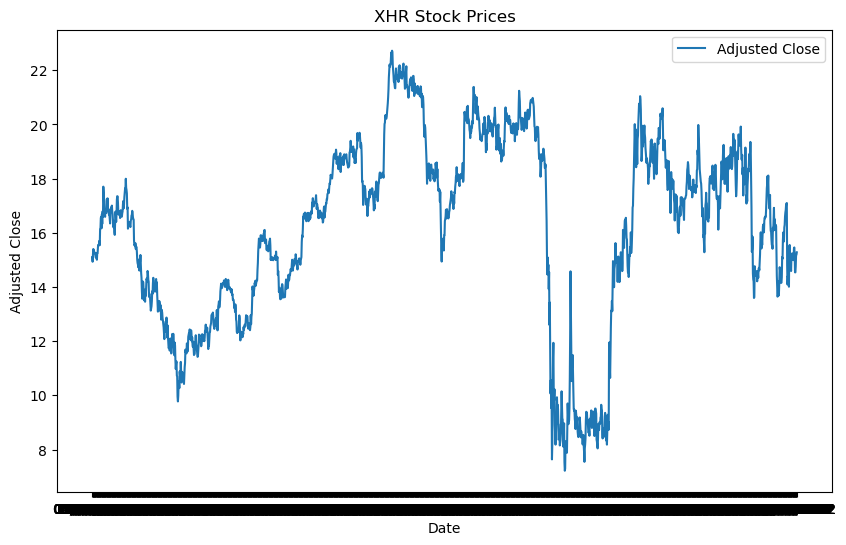

In [34]:
# Plotting 'Adjusted Close' stock prices
plt.figure(figsize=(10, 6))
plt.plot(xhr.index, xhr['Adjusted Close'], label='Adjusted Close')
plt.title('XHR Stock Prices')
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.legend()
plt.show()

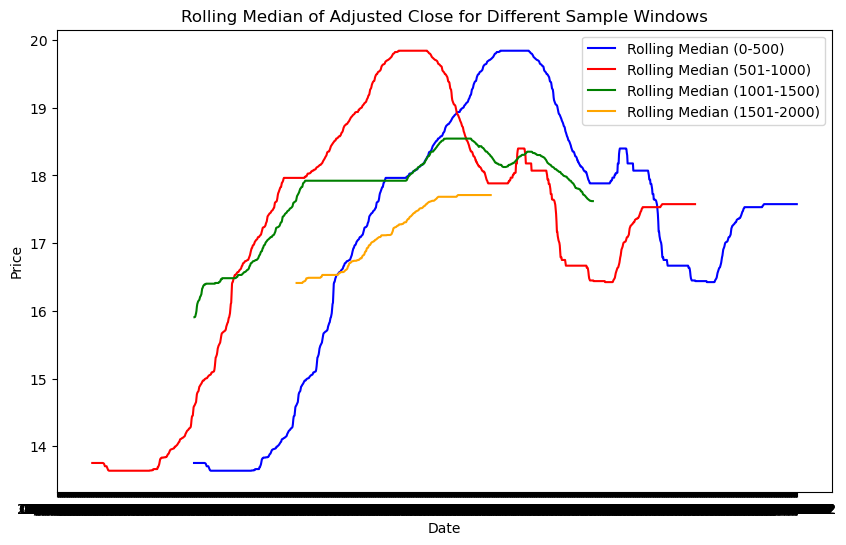

In [35]:
# Plotting rolling median for 'Adjusted Close'
plt.figure(figsize=(10, 6))
plt.plot(xhr.index, xhr['SM_AC0-500'], label='Rolling Median (0-500)', color='blue')
plt.plot(xhr.index, xhr['SM_AC501-1000'], label='Rolling Median (501-1000)', color='red')
plt.plot(xhr.index, xhr['SM_AC1001-1500'], label='Rolling Median (1001-1500)', color='green')
plt.plot(xhr.index, xhr['SM_AC1501-2000'], label='Rolling Median (1501-2000)', color='orange')
plt.title('Rolling Median of Adjusted Close for Different Sample Windows')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

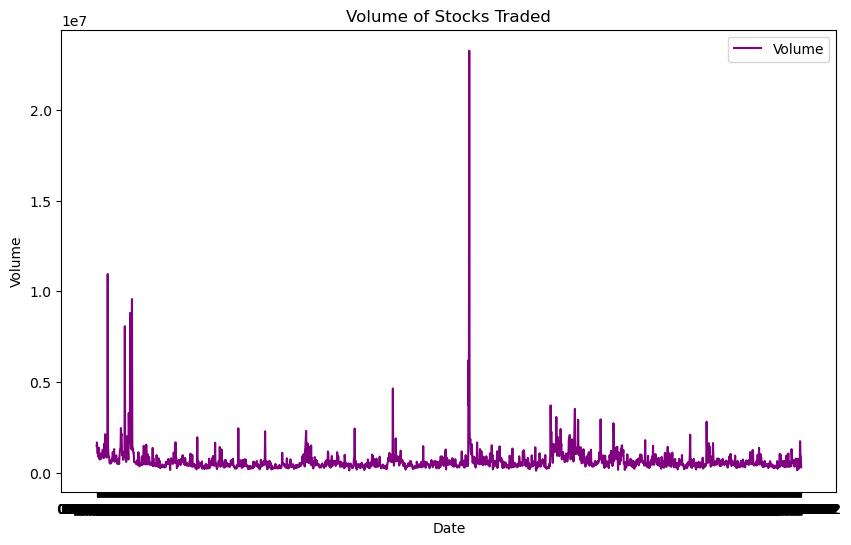

In [36]:
# Plotting Volume
plt.figure(figsize=(10, 6))
plt.plot(xhr.index, xhr['Volume'], label='Volume', color='purple')
plt.title('Volume of Stocks Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

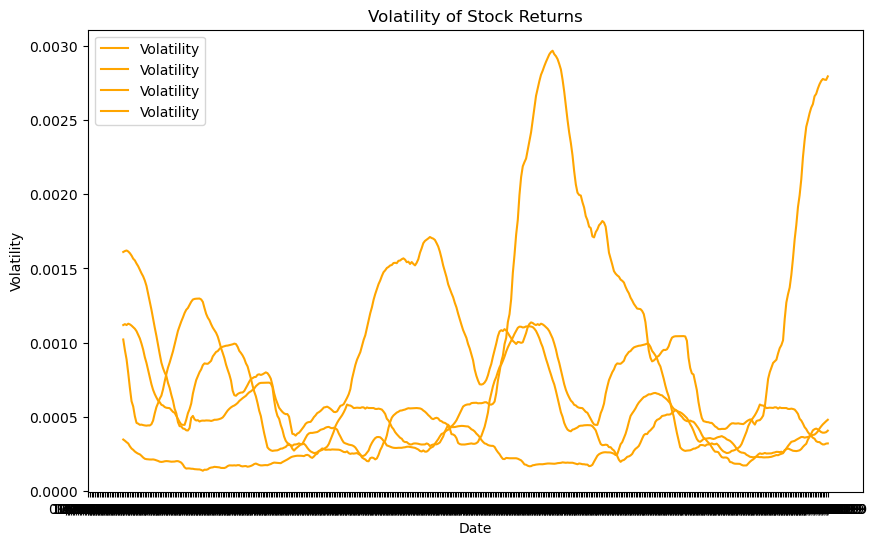

In [38]:
# Plotting Volatility
plt.figure(figsize=(10, 6))
plt.plot(xhr_volatility.index, xhr_volatility, label='Volatility', color='orange')
plt.title('Volatility of Stock Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1975,) and (499, 4)

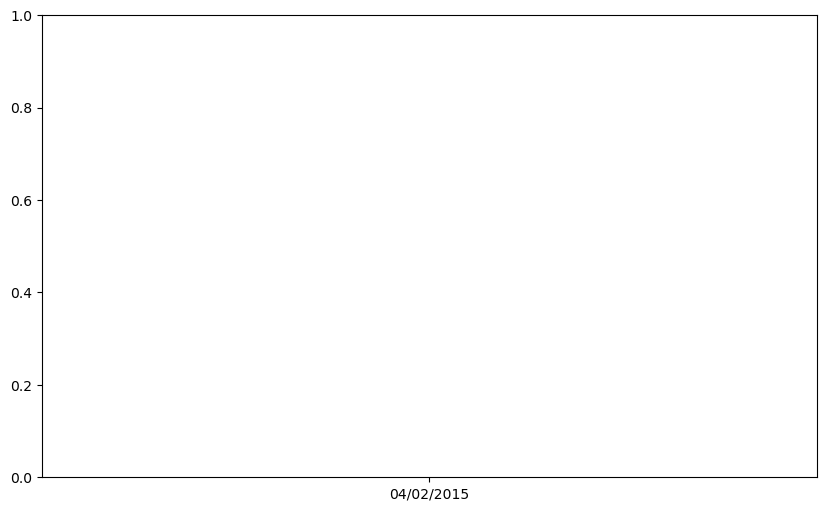

In [ ]:
# Plotting RSI
plt.figure(figsize=(10, 6))
xhr_CB.dropna()
plt.plot(xhr_CB.index, RSI(xhr_CB[['SM_CL0-500', 'SM_CL501-1000', 'SM_CL1001-1500', 'SM_CL1501-2000']]), label='RSI', color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
